# Loan Repayment Prediction using Random Forest (Кредитоспособност)

This notebook trains a Random Forest classifier to predict if a loan
is paid back, using one-hot encoded categorical features and 5-fold stratified cross-validation.

In [6]:
import csv
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [7]:
def read_file(file_name):
    with open(file_name) as doc:
        csv_reader = csv.reader(doc, delimiter=',')
        dataset = list(csv_reader)[1:]
    return dataset

In [8]:
dataset = read_file('../loan_dataset_20000.csv')

In [9]:
categorical_features = [1, 2, 3, 6, 10, 14]
X_cat = [[row[i] for i in categorical_features] for row in dataset]
X_num = [[float(row[i]) for i in range(len(row)-1) if i not in categorical_features] for row in dataset]

In [10]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat_encoded = encoder.fit_transform(X_cat)

In [11]:
X = np.array([list(X_num[i]) + list(X_cat_encoded[i]) for i in range(len(dataset))])
y = np.array([row[-1] for row in dataset])

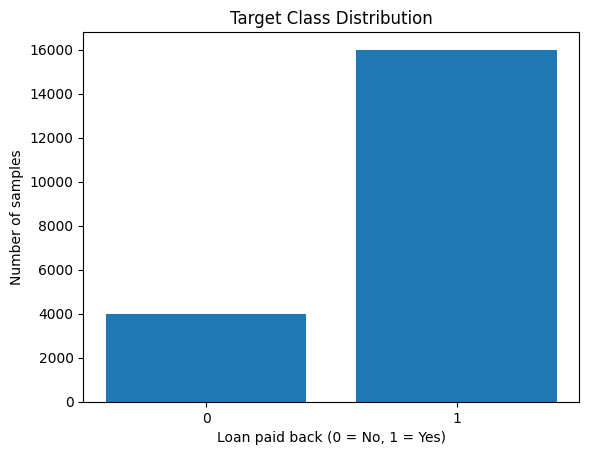

In [12]:
import matplotlib.pyplot as plt

unique, counts = np.unique(y, return_counts=True)

plt.figure()
plt.bar(unique, counts)
plt.xlabel("Loan paid back (0 = No, 1 = Yes)")
plt.ylabel("Number of samples")
plt.title("Target Class Distribution")
plt.show()

In [13]:
classifier = RandomForestClassifier(
        n_estimators=150,
        criterion='entropy',
        random_state=0,
        class_weight='balanced'
    )

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)

    accuracy = sum(predictions == y_test) / len(y_test)
    accuracies.append(accuracy)

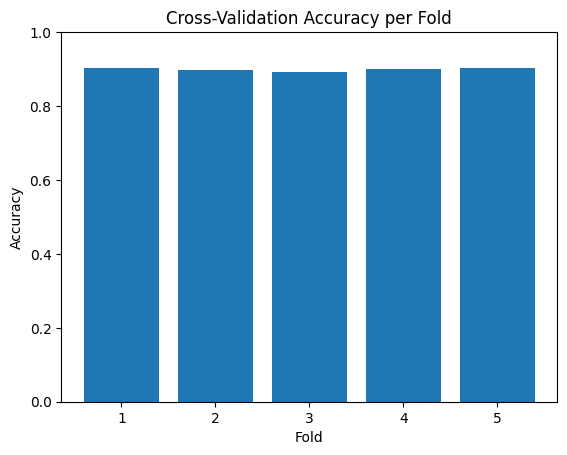

In [14]:
plt.figure()
plt.bar(range(1, len(accuracies) + 1), accuracies)
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Cross-Validation Accuracy per Fold")
plt.ylim(0, 1)
plt.show()

In [15]:
print(f'Cross-validation accuracies: {accuracies}')
print(f'Mean accuracy: {sum(accuracies) / len(accuracies)}')

Cross-validation accuracies: [np.float64(0.90375), np.float64(0.897), np.float64(0.892), np.float64(0.901), np.float64(0.90175)]
Mean accuracy: 0.8991


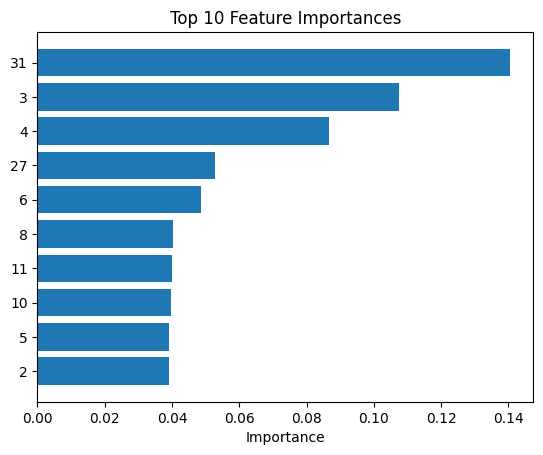

In [16]:
classifier.fit(X, y)
importances = classifier.feature_importances_

indices = np.argsort(importances)[-10:]

plt.figure()
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), indices)
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances")
plt.show()